**Problem Statement:**
*   You work for a consumer finance company which specialises in lending various
types of loans to urban customers. # When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
*  Two types of risks are associated with the bank’s decision:
  *   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
  *   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
*   The aim is to **identify patterns** which indicate if a person is **likely to default**, which may be used for taking # actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.




**Data Understanding**



We have been provided with the Private Data of Lending Club. The complete loan data for all loans issued through the time period 2007 to 2011.

We also have a data dictionary which describes the meaning of these variables.



In [2]:
# To load necessary libraries to work with the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Load the data in a dataframe to evaluate and visualize
df = pd.read_csv('/content/loan.csv')

In [5]:
# to get generic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


The dataset has 39717 rows and 111 columns.

In [6]:
# Lets view the first 5 rows of the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# All the columns of the dataframe
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)



Through the data dictionary, we can understand that:
1. Each row in the data has a unique **id** for the loan listing and **member_id** for the borrower.
2.  Each row contains these data about the loan offered:
    * loan_amnt - Listed amount of the loan applied the borrower
    * funded_amnt - Amount committed for the loan
    * funded_amnt_inv - Amount committed by the investors for the loan
    * term - No. of payments of loan in months
    * int_rate - Interest rate on the loan
    * installment - Monthly amount that the borrower needs to pay
    * issue_d - The month and year in which loan was funded
    * dti - Ratio of monthly payment / monthly income
    * out_prncp - Remaining outstanding principal from total amount funded.
    * total_pymnt - Payment received to date for total amount funded.
    * total_rec_int - Interest recieved to date
    * total_rec_late_fee - Late fee received to date
    * recoveries - post charge off gross recovery
    * collection_recovery_fee - post charge off collection fee
    * last_payment_d - Last month payment was received
    * last_payment_amt - Last amount received
    * next_payment_d - Next scheduled payment date
    
    Various categorical information about the loan:
    * grade and sub_grade - Grade/ Quality score assigned to loan
    * loan_status - Current status of the loan.
    * payment_plan - Payment plan has been put in place or not.
    * desc - Loan description provided by the borrower.
    * purpose - Category of the loan request
    * title - Title of the loan request
    * initial_list_status - Initial list status of the loan.
  


3. Each row contains various information about the borrower:

    * emp_title - Job title of the borrower
    * emp_length - Time the borrower has been employed
    * home_ownership - Home ownership status of the borrower
    * annual_inc - Annual income reported by the borrower
    * verification_status - Indication of whether income was verified or not
    * delinq_2y - No. of due incidents in borrower's credit file
    * mths_since_last_delinq - Months since last due incident
    * open_acc - No. of open credit lines in borrower's credit file
    * pub_rec - No. of derogatory public records
    * revol_bal - Total credit revolving balance
    * revol_util - The amount of credit the borrower is using relative to all available revolving credit.
    * total_acc - Total number of credit lines

4. Geograohic information about the borrower:
    * zip_code - Zip code provided by the owner
    * addr_state - State provided by the owner













In [8]:
# Lets find out the available loan status values:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

3 Available Loan statues:
1. Fully paid
2. Charged Off
3. Current

From the problem statement, we are only concerned about the Charged Off statuses.

In [9]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

Home ownership status has 4 values:
1. RENT
2. OWN
3. MORTGAGE
4. OTHER

In [10]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

Various purpose of the loans are given which can help us in deciphering what causes the most defaulters.

In [11]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

Verification status will tell us if the borrower's income was verified by the organisation or not.

**DATA CLEANING**

There are various ways to clean the data:
1. Fix rows and columns
2. Fix missing values
3. Standardise values
4. Fix invalid values
5. Filter data

First, lets filter out "Charged Off" loans as we will only be dealing with such loans

In [12]:
df = df[df['loan_status'] == 'Charged Off']

In [13]:
df.shape

(5627, 111)

In [14]:
# Now, lets get missing percentages for each column
miss_percentage = round(100*(df.isnull().sum()/len(df.id)), 1)
miss_percentage.loc[miss_percentage > 0]

,0
emp_title,8.6
emp_length,4.1
desc,32.0
mths_since_last_delinq,61.9
mths_since_last_record,89.7
revol_util,0.3
last_pymnt_d,1.3
next_pymnt_d,100.0
collections_12_mths_ex_med,0.1
mths_since_last_major_derog,100.0


In [15]:
# Let's remove all columns with geater than 65% missing percentage as it will skew the data
# Columns with all missing values:

columns_with_missing_values = list(miss_percentage[miss_percentage > 65].index)
print(columns_with_missing_values)

df.drop(columns_with_missing_values, axis=1, inplace=True)

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

In [16]:
df.shape

(5627, 55)

In [17]:
# Checking for duplicated rows in data
df.duplicated().sum()

0

There are no duplicated rows in the dataset

In [18]:
# check for empty rows in the dataset
df.isnull().all(axis=1).sum()

0

There are no empty rows in the dataset


In [19]:
# Check for all columns which have only 1 unique value in the dataset and remove them as they will not help in the analysis.
df.nunique()[df.nunique() == 1].index

Index(['loan_status', 'pymnt_plan', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'tax_liens'],
      dtype='object')

In [20]:
# Lets drop these columns
df.drop(df.nunique()[df.nunique() == 1].index, axis=1, inplace=True)

In [21]:
df.shape

(5627, 43)

In [22]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
# Let's check for unique values for id and memeber_id columns
print(df['id'].nunique())
print(df['member_id'].nunique())

5627
5627


In [24]:
# Lets also check for text columns like url, title, desc
print(df['url'].nunique())
print(df['title'].nunique())
print(df['desc'].nunique())
print(df['zip_code'].nunique())
print(df['emp_title'].nunique())

5627
3249
3797
666
4636


As all values are unique or have ids, lets remove them as they will not help in analysis.

In [25]:
df.drop(['url', 'title', 'desc', 'id', 'member_id', 'emp_title'], axis=1, inplace=True)

In [26]:
df.shape

(5627, 37)

In [27]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [28]:
# Lets remove the columns which will not impact whether a borrower defaulted or not.
cols = [
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'collection_recovery_fee',
 'recoveries',
 'pub_rec',
 'earliest_cr_line',
 'mths_since_last_delinq'
]
df.drop(cols, axis=1, inplace=True)

In [29]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'pub_rec_bankruptcies'],
      dtype='object')

In [30]:
df.shape

(5627, 19)

In [31]:
df.dtypes

,0
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object
emp_length,object
home_ownership,object


Let's convert the columns to proper data types

In [32]:
# Lets get the values for term column
df['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [33]:
# Lets convert the term values
df['term'] = df['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [34]:
# Lets get the values for interest rates
df['int_rate'][:5]

,int_rate
1,15.27%
8,21.28%
9,12.69%
12,13.49%
14,10.65%


In [35]:
# lets remove % and convert interest rate to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%', '')))

In [36]:
df['int_rate'][:5]

,int_rate
1,15.27
8,21.28
9,12.69
12,13.49
14,10.65


In [37]:
# Round of values for float columns for easy interpretation
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df[col] = df[col].apply(lambda x: round(x, 2))

In [38]:
# Lets check the values for issue_d
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07'], dtype=object)

In [39]:
# Lets convert issue date to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [40]:
df['issue_d'][:5]

,issue_d
1,2011-12-01
8,2011-12-01
9,2011-12-01
12,2011-12-01
14,2011-12-01


In [41]:
# Lets get the values for employee length
df['emp_length'].unique()

array(['< 1 year', '4 years', '3 years', '10+ years', '1 year', '9 years',
       '2 years', '8 years', '7 years', '5 years', nan, '6 years'],
      dtype=object)

In [42]:
# Lets convert this data to int:
emp_length_map = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
df['emp_length'] = df['emp_length'].map(emp_length_map)

In [43]:
df['emp_length'].unique()

array([ 0.,  4.,  3., 10.,  1.,  9.,  2.,  8.,  7.,  5., nan,  6.])

In [44]:
df.dtypes

,0
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,int64
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_length,float64
home_ownership,object


**Handle outliers in the data**

In [45]:
# Let's check if annual income has outliers
df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

,annual_inc
count,5627.000000
mean,62427.298034
std,47776.014188
min,4080.000000
25%,37000.000000
50%,53000.000000
75%,75000.000000
max,1250000.000000


As we can see the max and min have huge differences from IQR which can be supported by the boxplot.

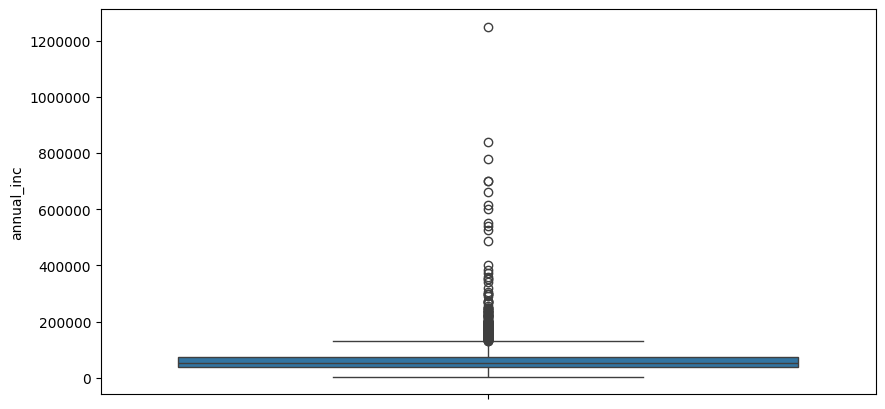

In [46]:
# Lets create a box plot for the same
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(10, 5))
sns.boxplot(df['annual_inc'])
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()

In [47]:
# Let's remove the outliers from the annual income.
q1 = df['annual_inc'].quantile(0.25)
q3 = df['annual_inc'].quantile(0.75)
iqr = q3 - q1
df = df[(df['annual_inc'] >= q1 - 1.5*iqr) & (df['annual_inc'] <= q3 + 1.5*iqr)]

In [48]:
df.shape

(5367, 19)

In [49]:
df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

,annual_inc
count,5367.000000
mean,55676.891137
std,25516.521797
min,4080.000000
25%,36000.000000
50%,51200.000000
75%,70000.000000
max,132000.000000


In [50]:
df['dti'].describe().apply(lambda x: format(x, 'f'))

,dti
count,5367.000000
mean,14.126827
std,6.590409
min,0.000000
25%,9.210000
50%,14.440000
75%,19.440000
max,29.850000


The dti ratio most values are b/w 8 to 18 does not seem to have outlier.

Impute data in columns

In [51]:
# Lets get count of missing values for each column in dataframe
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,225
home_ownership,0


In [52]:
# Lets impute employee length column
# Lets find out annual income of employees with null emp_length
df[df['emp_length'].isnull()]['annual_inc'].describe().apply(lambda x: format(x, 'f'))

,annual_inc
count,225.000000
mean,38310.072489
std,20149.047275
min,8412.000000
25%,22800.000000
50%,36000.000000
75%,49995.000000
max,100000.000000


In [53]:
df['emp_length'].mode()

,emp_length
0,10.00


Let's fill emp_length with 10 as these people tend to have high income and are mostly business owners.

In [54]:
df['emp_length'] = df['emp_length'].fillna(10)

In [55]:
df.verification_status.value_counts()

,count
verification_status,
Not Verified,2083
Verified,1917
Source Verified,1367


We can combine Verified and Source Verified	into one category.

In [56]:
df['verification_status'] = df['verification_status'].apply(lambda x: 'Verified' if x == 'Source Verified' else x)

In [57]:
df.verification_status.value_counts()

,count
verification_status,
Verified,3284
Not Verified,2083


In [58]:
# Lets also impute pub_rec_bankruptcies with -1 to not consider them.
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(-1)

In [59]:
# Lets get count of missing values for each column in dataframe
df.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


Now the data is fully cleaned.

Derive New columns to help in analysis.

In [60]:
# Lets separate out the issue year, quarter and month columns
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['issue_quarter'] = df['issue_d'].dt.quarter

In [61]:
# Lets divide the float columns into multiple ranges for easy analysis and interpretation
df['loan_amnt'].describe().apply(lambda x: format(x, 'f'))

,loan_amnt
count,5367.000000
mean,11769.196013
std,7869.036981
min,900.000000
25%,5500.000000
50%,10000.000000
75%,16000.000000
max,35000.000000


In [62]:
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])

In [63]:
df['loan_amnt_range'].value_counts()

,count
loan_amnt_range,
"(5000, 10000]",1593
"(0, 5000]",1296
"(10000, 15000]",1015
"(15000, 20000]",718
"(20000, 25000]",474
"(30000, 35000]",152
"(25000, 30000]",119


In [64]:
df['int_rate'].describe().apply(lambda x: format(x, 'f'))

,int_rate
count,5367.000000
mean,13.753313
std,3.632349
min,5.420000
25%,11.220000
50%,13.490000
75%,16.320000
max,24.400000


In [112]:
df['int_rate_range'] = pd.cut(df['int_rate'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
df['int_rate_range'].value_counts()

,count
int_rate_range,
"(12, 14]",1124
"(10, 12]",1025
"(14, 16]",967
"(16, 18]",774
"(18, 20]",405
"(6, 8]",376
"(8, 10]",375
"(20, 22]",203
"(22, 24]",61


In [66]:
df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

,annual_inc
count,5367.000000
mean,55676.891137
std,25516.521797
min,4080.000000
25%,36000.000000
50%,51200.000000
75%,70000.000000
max,132000.000000


In [67]:
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000])
df['annual_inc_range'].value_counts()

,count
annual_inc_range,
"(40000, 60000]",1729
"(20000, 40000]",1514
"(60000, 80000]",1024
"(80000, 100000]",531
"(100000, 120000]",244
"(0, 20000]",237
"(120000, 140000]",88


In [68]:
df['dti'].describe().apply(lambda x: format(x, 'f'))

,dti
count,5367.000000
mean,14.126827
std,6.590409
min,0.000000
25%,9.210000
50%,14.440000
75%,19.440000
max,29.850000


In [113]:
df['dti_range'] = pd.cut(df['dti'], bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])
df['dti_range'].value_counts()

,count
dti_range,
"(12, 14]",559
"(14, 16]",548
"(16, 18]",544
"(18, 20]",537
"(20, 22]",490
"(10, 12]",481
"(8, 10]",437
"(22, 24]",437
"(6, 8]",352


In [70]:
df['funded_amnt'].describe().apply(lambda x: format(x, 'f'))

,funded_amnt
count,5367.000000
mean,11441.098379
std,7557.815567
min,900.000000
25%,5300.000000
50%,10000.000000
75%,15600.000000
max,35000.000000


In [71]:
df['funded_amnt_range'] = pd.cut(df['funded_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
df['funded_amnt_range'].value_counts()

,count
funded_amnt_range,
"(5000, 10000]",1613
"(0, 5000]",1312
"(10000, 15000]",1052
"(15000, 20000]",736
"(20000, 25000]",424
"(30000, 35000]",126
"(25000, 30000]",104


Now that we have cleaned the data and found derived columns, let's start with univariate analyis.

**UNIVARIATE ANALYIS**

ORDERED CATEGORICAL VARIABLES

1. Grade

In [72]:
df['grade'].value_counts()

,count
grade,
B,1368
C,1313
D,1068
E,650
A,587
F,287
G,94


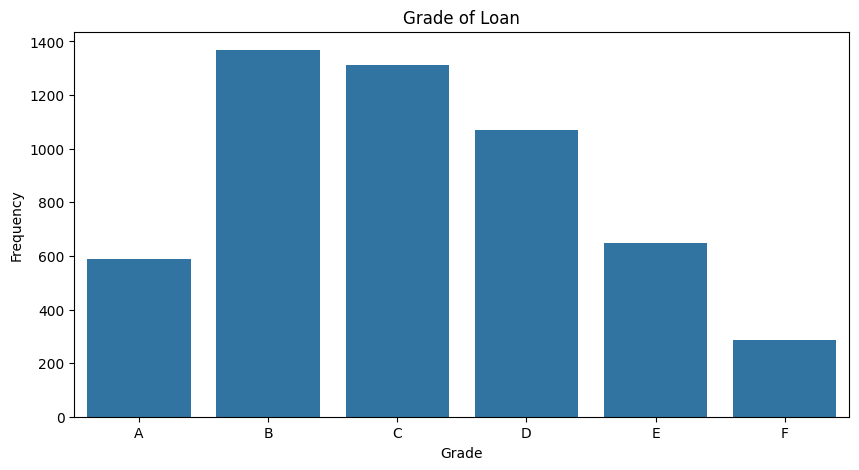

In [73]:
# Lets plot a bar graph for grade and sub grade of loan provided
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='grade', order=grade_order)
plt.title('Grade of Loan')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

Grade B and C have highest number of defaulters indicating that such loan grades contribute to more defaulters.

2. Sub grade

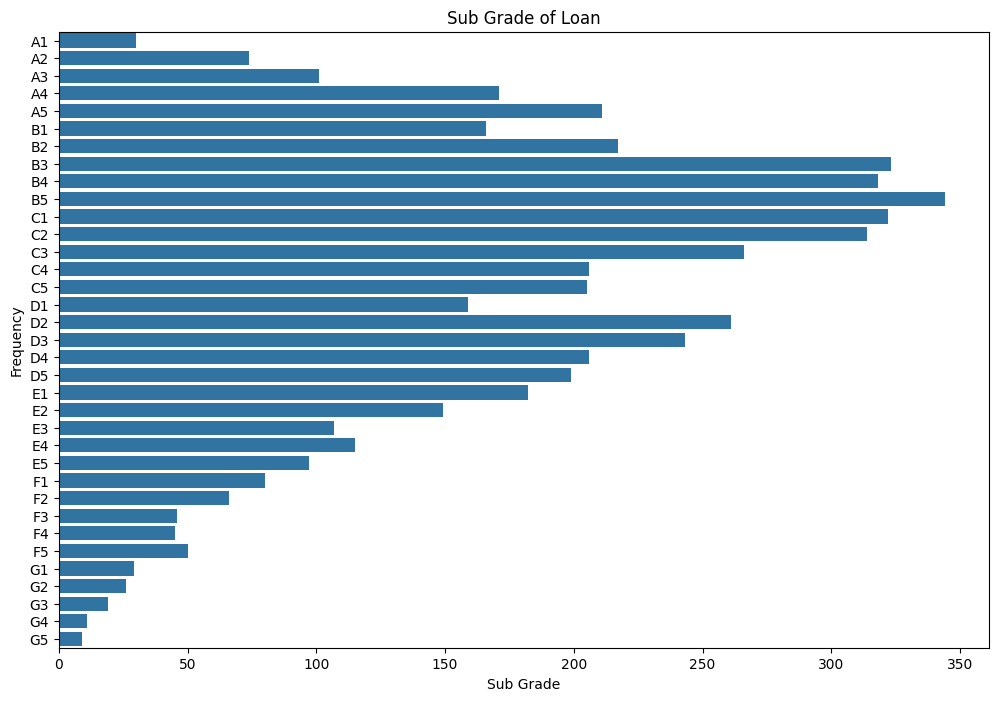

In [74]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df['sub_grade'].sort_values())
plt.title('Sub Grade of Loan')
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.show()

The same interpretation from the previous graph that sub grades of B have the highest defaulter with the highest defaulter being of "B5" sub-grade

3. Term

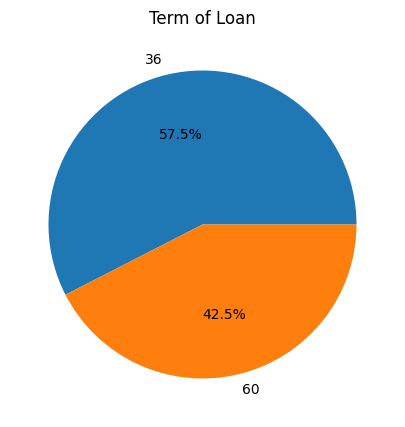

In [75]:
# Lets plot a pie chart for term
plt.figure(figsize=(10, 5))
df['term'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Term of Loan')
plt.ylabel('')
plt.show()

As we can see, short term loans have more defaulters, which indiactes that people fail to pay more often when they take loan for a shorter term.

4. Employment Length

In [76]:
df['emp_length'] = df['emp_length'].astype(int)

In [77]:
df['emp_length'].value_counts()

,count
emp_length,
10,1478
0,612
2,542
3,532
1,445
4,439
5,439
6,293
7,251


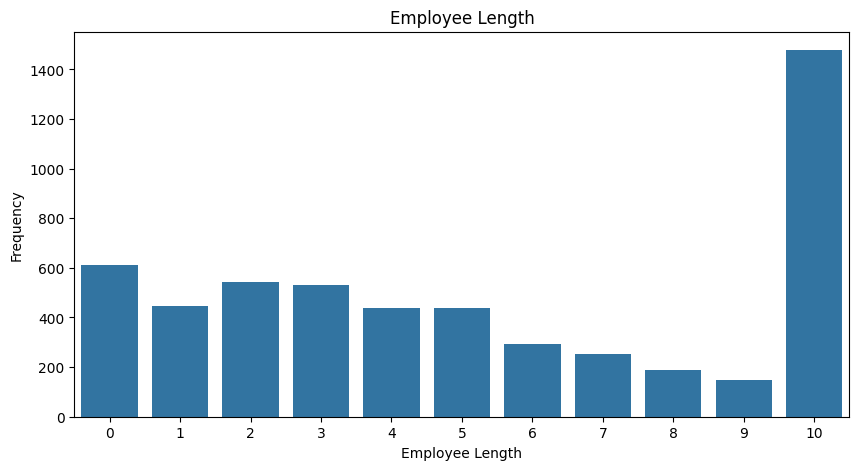

In [78]:
# Plot count plot for employee length
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='emp_length')
plt.title('Employee Length')
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.show()

Employees with the highest work duration are defaulting the most. This is surprising and is an important note for the organisation to not consider this a huge bonus when approving a loan.

5. Issue Year

In [79]:
df['issue_year'].value_counts()

,count
issue_year,
2011,3115
2010,1415
2009,560
2008,237
2007,40


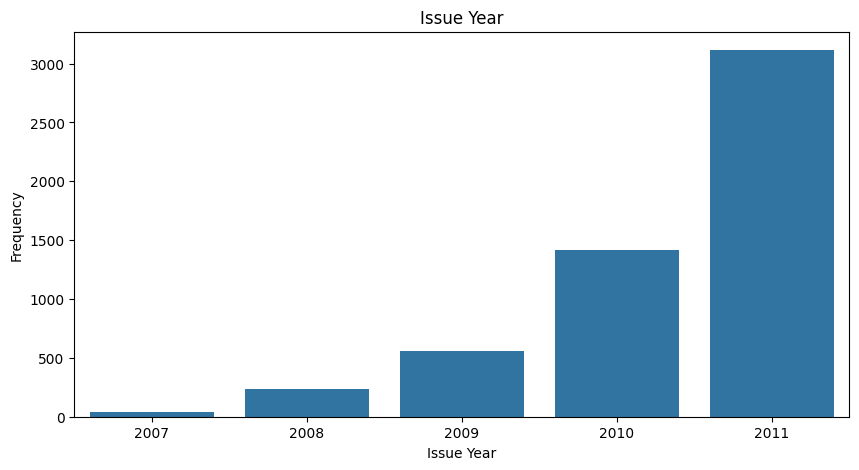

In [80]:
# Plot count plot for employee length
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='issue_year')
plt.title('Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Frequency')
plt.show()

Year 2011 has the most number of defaulters. This could indicate financial changes / recession during the year.

6. Issue month

In [81]:
df['issue_month'].value_counts()

,count
issue_month,
12,654
11,576
10,540
9,529
6,456
7,452
8,447
5,445
4,356


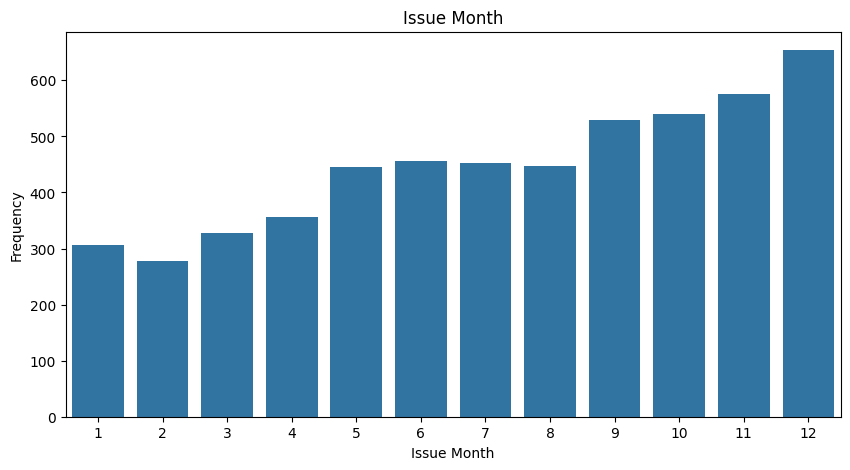

In [82]:
# Bar graph to show count in various months
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='issue_month')
plt.title('Issue Month')
plt.xlabel('Issue Month')
plt.ylabel('Frequency')
plt.show()

Loans taken in the final quarter(Q4) especially dec has the highest number of defaulters indicating holiday Spending leading to financial strain.

**UNORDERED CATEGORICAL VARIABLES**

1. Home Ownership

In [83]:
df['home_ownership'].value_counts()

,count
home_ownership,
RENT,2761
MORTGAGE,2158
OWN,431
OTHER,17


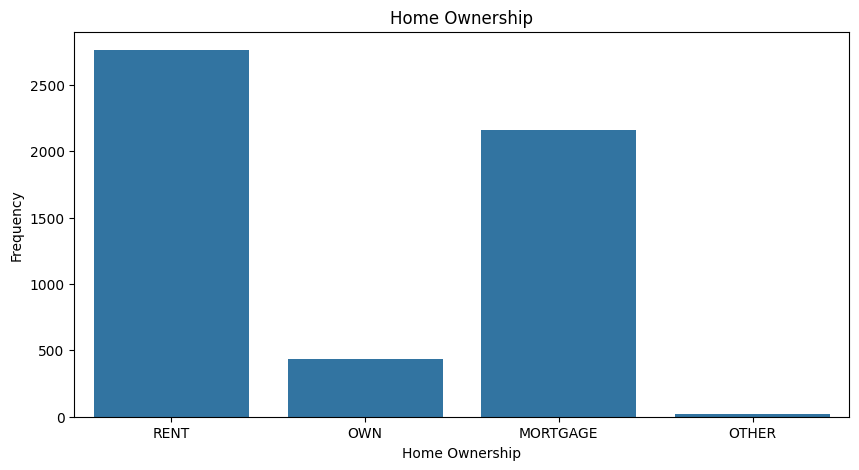

In [84]:
# Plot chart for borrower home ownership
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='home_ownership')
plt.title('Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

Borrowers living in rented / mortgaged homes form majority of defaulters. This is a strong factor to assess for the company before approving a loan.

2. Loan Purpose

In [85]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,2657
other,601
credit_card,515
small_business,448
home_improvement,315
major_purchase,214
car,158
medical,102
wedding,91


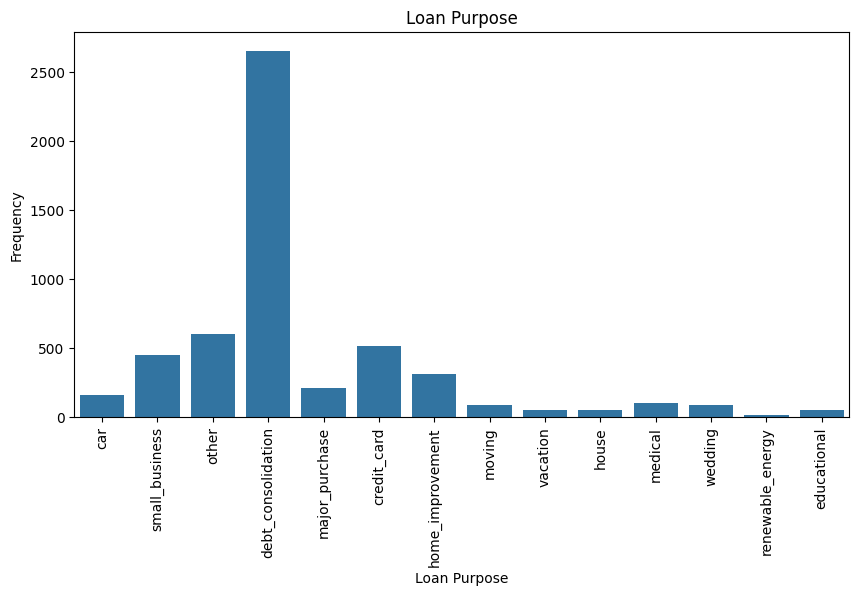

In [86]:
# Plot a graph to show the purpose of the loan provided
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='purpose')
plt.title('Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Applicants who have Debt consolidation purpose form the highest number of defaulters. Lending companies need to assess their portfolios carefully.

3. **Address State**

Text(0.5, 0, 'Address State')

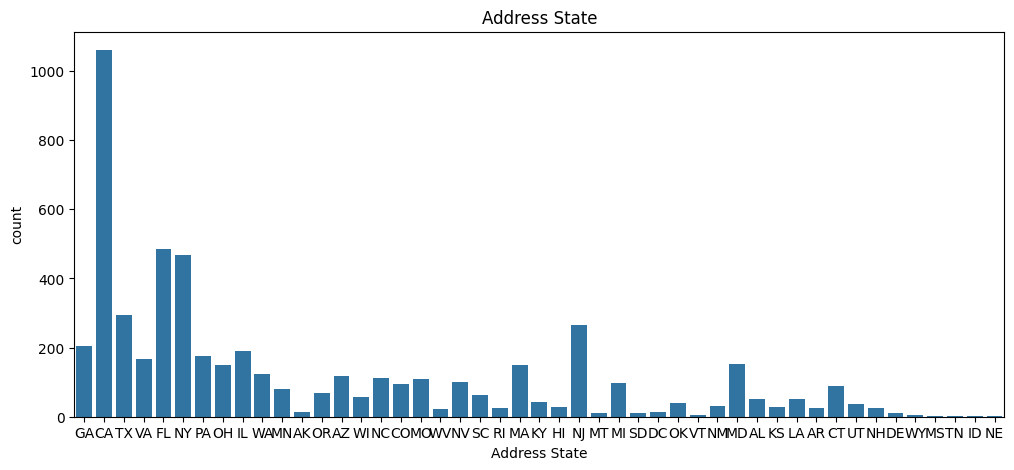

In [87]:
# Plot a graph to show the counts of states of defaulters
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='addr_state')
plt.title('Address State')
plt.xlabel('Address State')

California(CA) has the highest number of defaulters. Stricter assessments needs to be done for this state.

4. Verification status

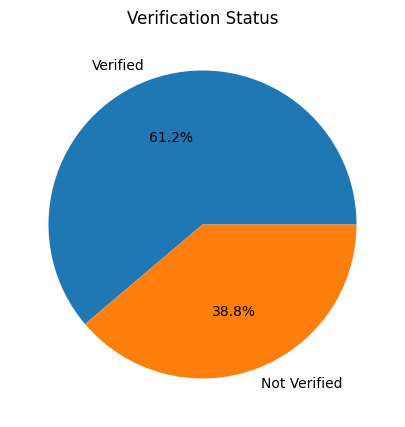

In [88]:
# pie chart to show verification status
plt.figure(figsize=(10, 5))
df['verification_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verification Status')
plt.ylabel('')
plt.show()

The verified ones form higher % of defaulters. This means the verification is not proper and lending company should take strict actions against the verification department.

**QUANTITATIVE VARIABLES**

1. Interest rate

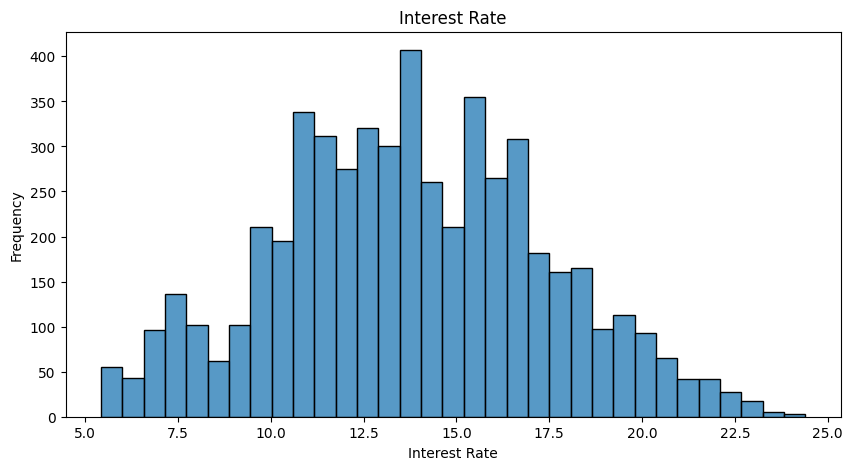

In [89]:
# Histogram to show the interest rates
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='int_rate')
plt.title('Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

A considerable portion belonged to the interest rate bucket of 13%-17%. To reduce the risk of default, the lending company should consider offering loans at lower interest rates when possible.

2. Annual Income

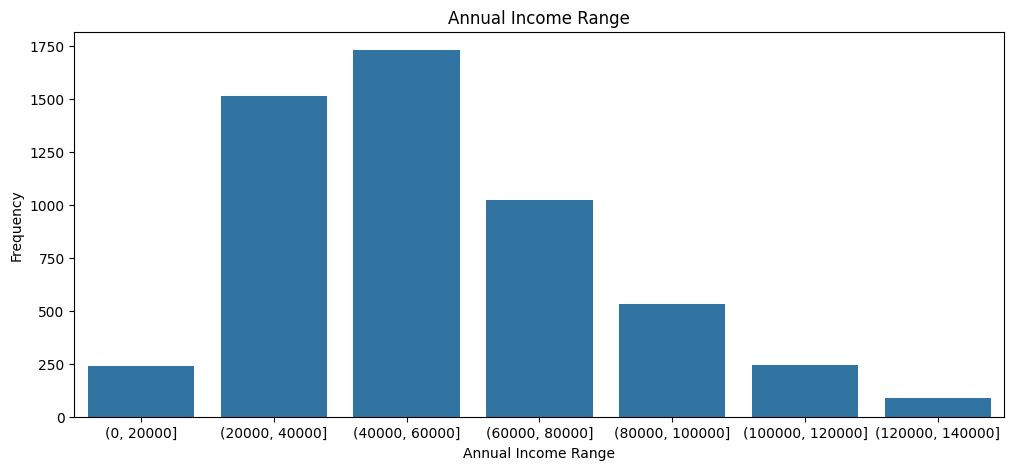

In [90]:
# Plot to show annual income. We will use the ranges column here
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='annual_inc_range')
plt.title('Annual Income Range')
plt.xlabel('Annual Income Range')
plt.ylabel('Frequency')
plt.show()

Borrowers with annual income b/w 20000 and 60000 form the most number of defaulters. So, the company should prioritise ppl with more income when provding loans to avoid risk.

3. Debt to income ratio

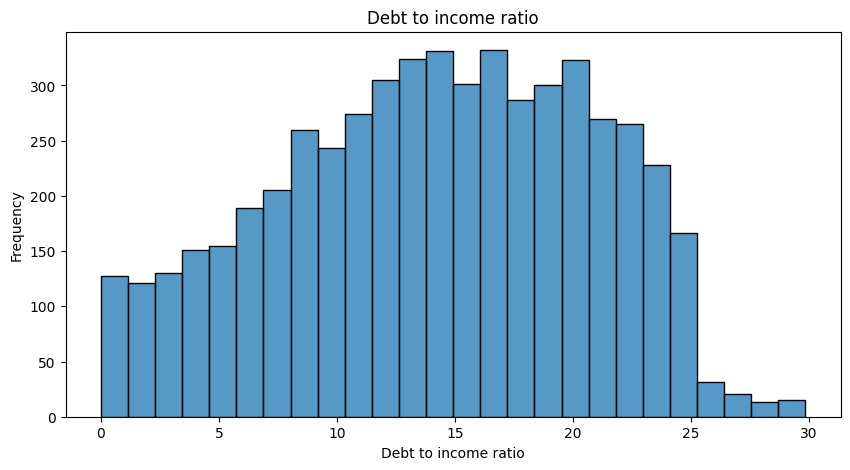

In [91]:
# Histogram to show debt to income ratio
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='dti')
plt.title('Debt to income ratio')
plt.xlabel('Debt to income ratio')
plt.ylabel('Frequency')
plt.show()

People with very high debt-to-income form the highest number of defaulters. There should be stricter cut off of dti ratio of the borrowers.

4. Loan amount

Text(0, 0.5, 'Frequency')

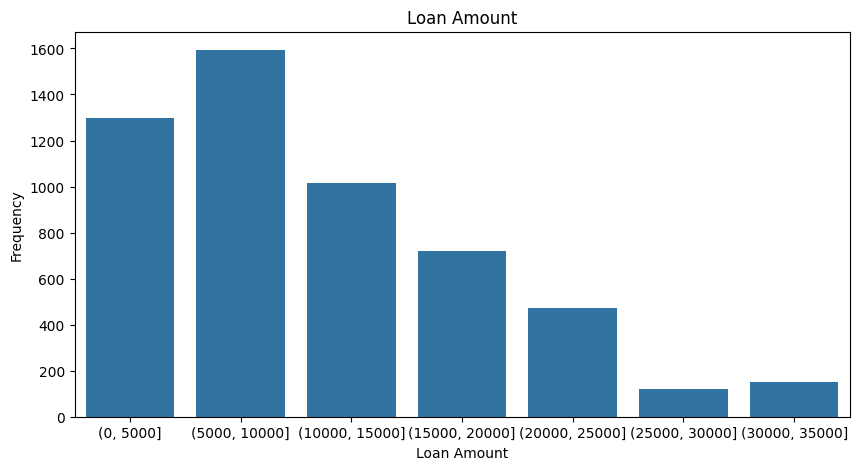

In [92]:
# Plot a bar graph for the loan amount
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='loan_amnt_range')
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

Suprisingly, lower loan amounts form highest % of defaulters. Generally, smaller loans are provided to people with lower credit score, which could be a reason for the loan not getting paid.

5. Monthly installments

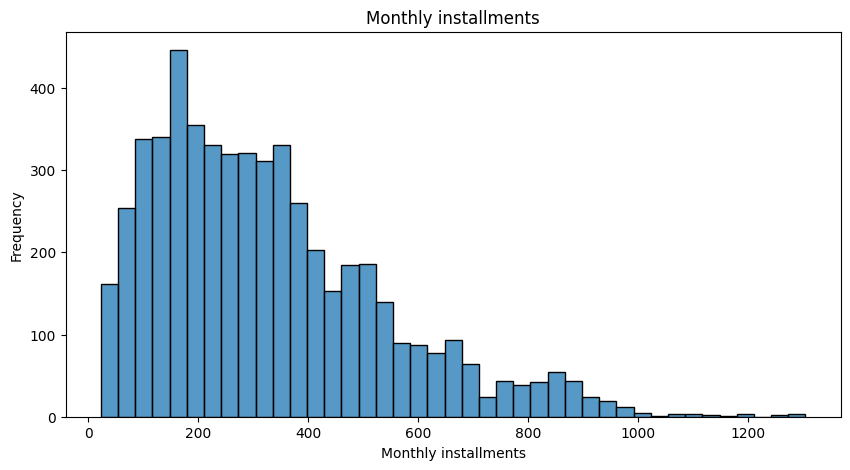

In [93]:
# Plot graph to show monthly installments
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='installment')
plt.title('Monthly installments')
plt.xlabel('Monthly installments')
plt.ylabel('Frequency')
plt.show()

Loans with a monthly installment of around 200 USD have the most defaulters. This could again indicate lower credit score borrowers.

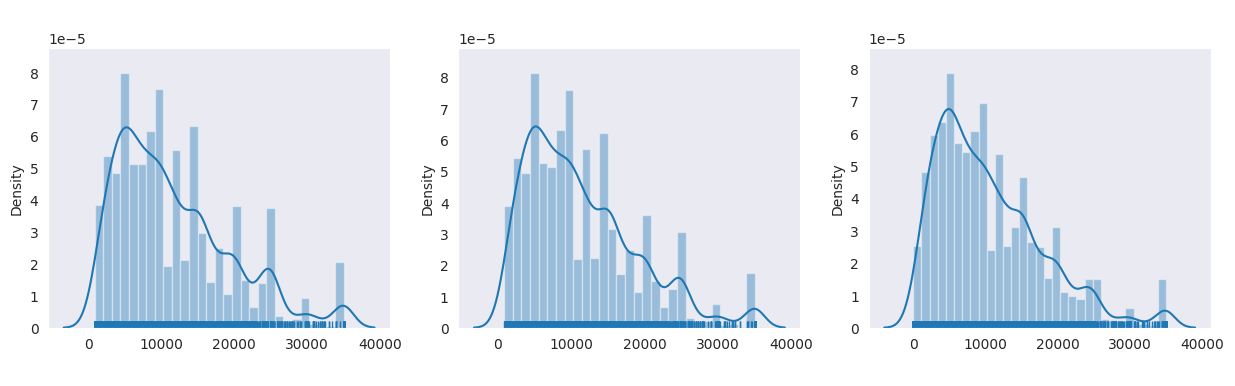

In [94]:
# Lets plot distplot for loan_amnt, funded_amnt, funded_amnt_inv
plt.figure(figsize=(15,8), dpi=100)
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(df['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

As we can see distribution plot for loan amount, funded amount and funded amount inv is exactly the same, so we will only use loan_amnt out of the three for further analysis.

**BIVARIATE ANALYSIS**

1. Loan amount vs grade

Text(0.5, 0, 'Grade')

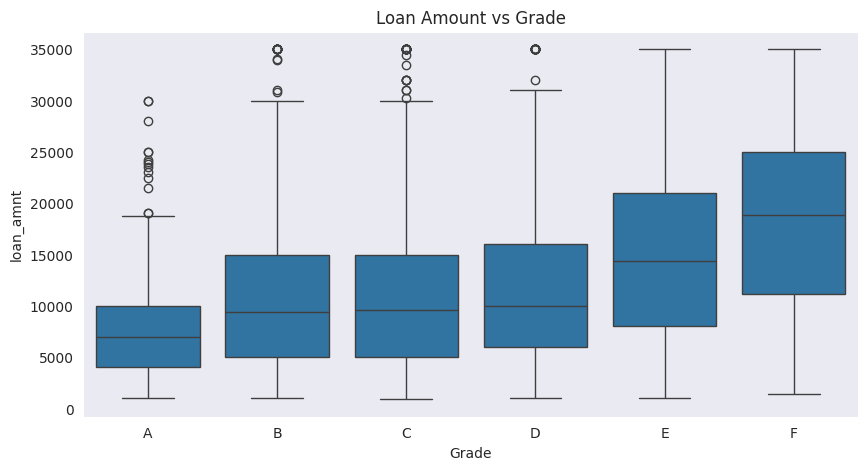

In [95]:
# Plotting a graph for loan amount vs grade
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='grade', y='loan_amnt', order=grade_order)
plt.title('Loan Amount vs Grade')
plt.xlabel('Grade')

Higher loan amounts tend to have worse grade which can imply bad credit scores, high-risk browser profile. So the company should carefully assess lending high amount to borrowers with bad LC grade.

2. Loan amount vs emp_length

Text(0.5, 0, 'Employment Length')

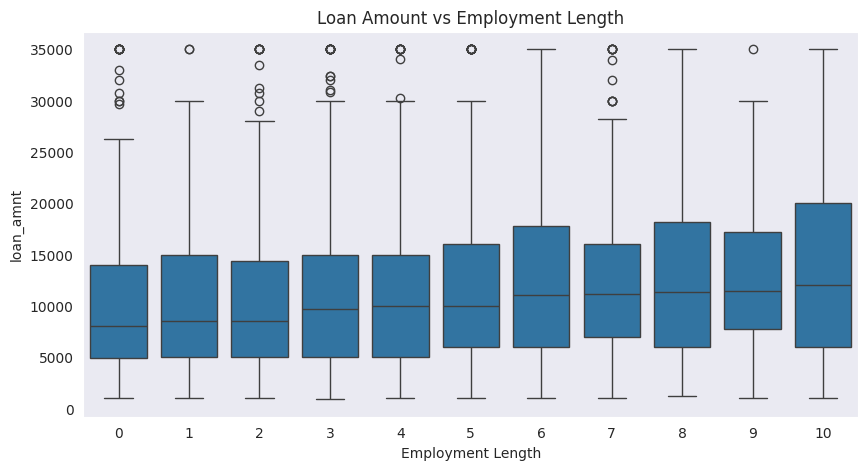

In [96]:
# Plotting a graph for median loan amount vs employment length
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='emp_length', y='loan_amnt')
plt.title('Loan Amount vs Employment Length')
plt.xlabel('Employment Length')

As we see the loan amount does not vary widely with borrower's employment length since the median loan amount of all employment length is b/w 7500 and 10000

3. Loan amount vs verification status

Text(0.5, 1.0, 'Loan Amount vs Verification Status')

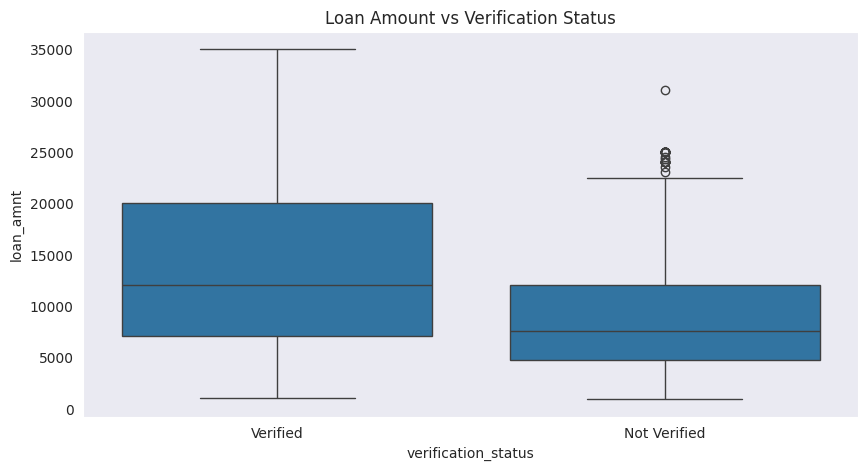

In [97]:
# Plotting graph for loan amount vs verification status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='verification_status', y='loan_amnt')
plt.title('Loan Amount vs Verification Status')

As we can see in the graph, higher loan amounts have more counts and are verified more. This could explain more verified defaulters. As higher loans tend to be riskier and verified easily by the company.

4. Loan amount vs issue year

Text(0.5, 0, 'Issue Year')

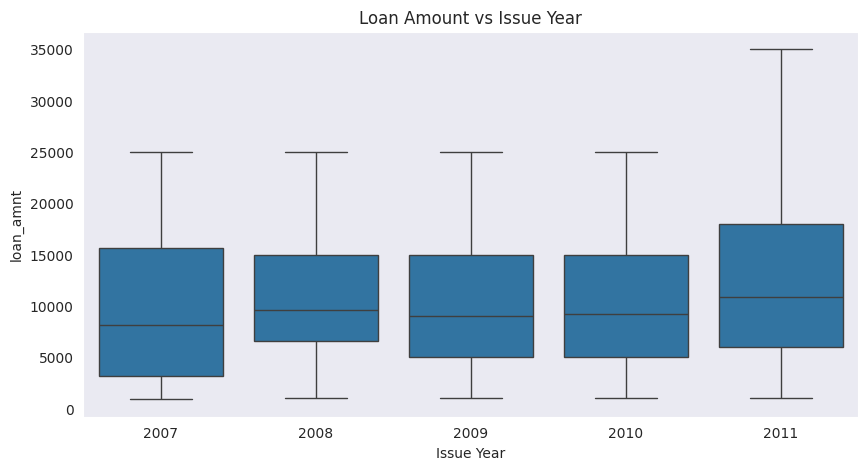

In [98]:
# Plotting graph for Loan amount vs issue year
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='issue_year', y='loan_amnt')
plt.title('Loan Amount vs Issue Year')
plt.xlabel('Issue Year')

Borrowers in 2011 have applied for higher loan amounts as compared to other years. This could again prove previous issue_y analysis that some recession / financial challeneges would have occured in this year

5. Interest rate vs term vs grade

Text(0.5, 0, 'Grade')

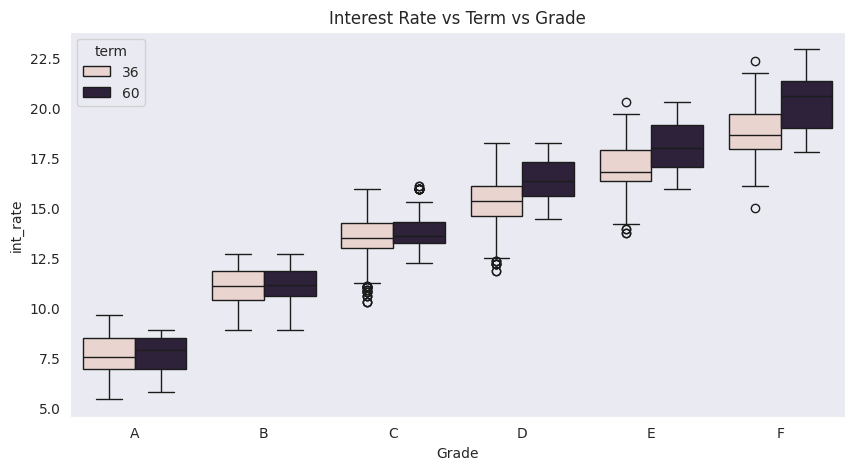

In [99]:
# Plot chart for interest rate vs term vs grade
plt.figure(figsize=(10, 5))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
sns.boxplot(data=df, x='grade', y='int_rate', hue='term', order=grade_order)
plt.title('Interest Rate vs Term vs Grade')
plt.xlabel('Grade')

As we can see from the chart above, higher interest rates are for larger term ( 60 months) and have worse LC grade.

6. Dti ratio vs verification status

Text(0.5, 0, 'Verification Status')

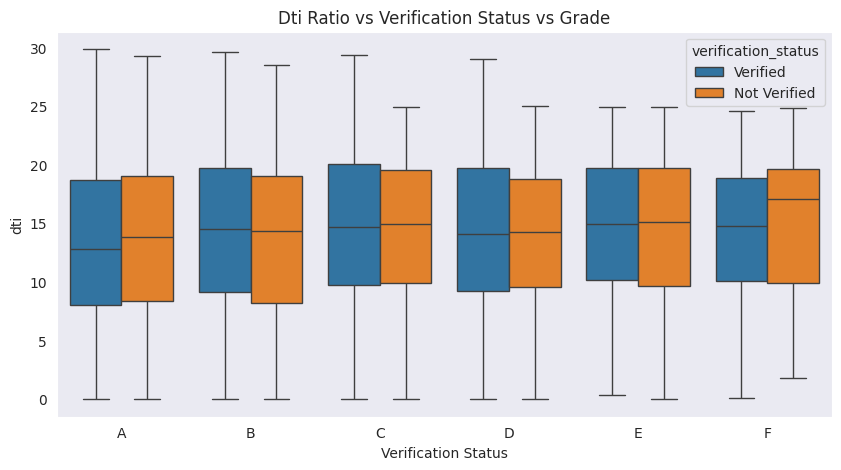

In [100]:
# Plot graph for how dti ratio vs verification status vs grade
plt.figure(figsize=(10, 5))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
sns.boxplot(data=df, x='grade', y='dti', hue='verification_status', order=grade_order)
plt.title('Dti Ratio vs Verification Status vs Grade')
plt.xlabel('Verification Status')


Debt to Income ratio does not vary widely with grade or verification status

7. Annual income vs loan amount

Text(0.5, 0, 'Annual Income')

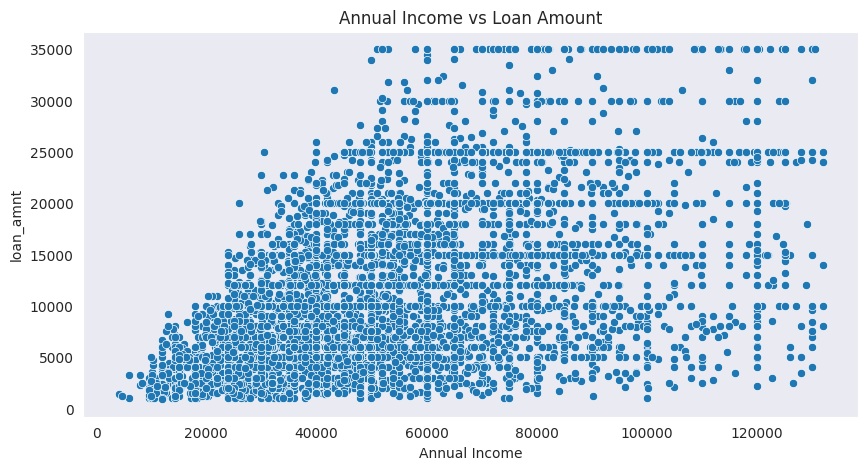

In [101]:
# Plot graph for annual income vs loan amount
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='annual_inc', y='loan_amnt')
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')

There are borrowers with annual income lower than 60000, taking loans of 30000 or more which is risky and must be assessed

7. Annual income vs Address State

Text(0.5, 0, 'Address State')

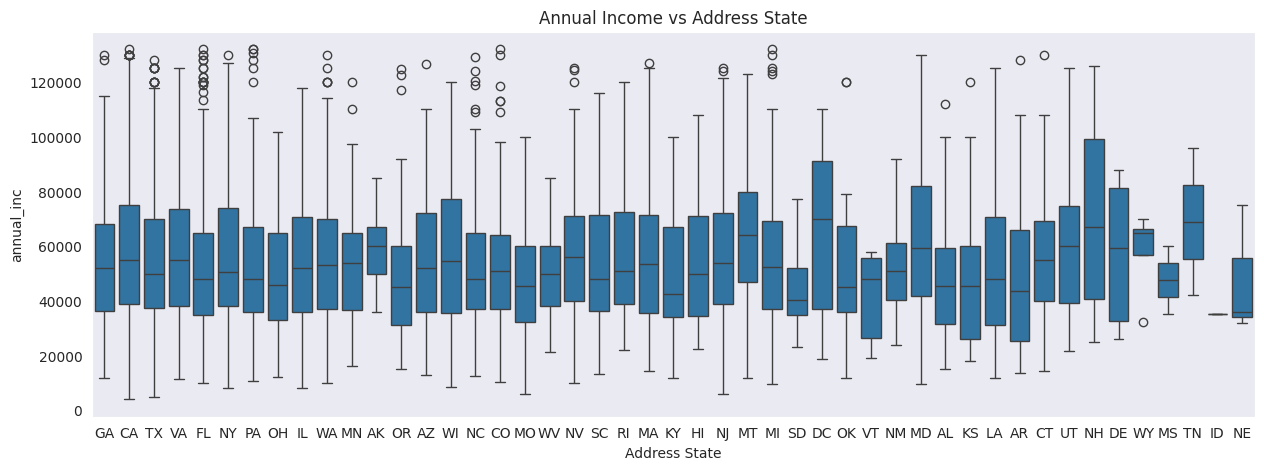

In [102]:
# Plot graph for annual income vs address state
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='addr_state', y='annual_inc')
plt.title('Annual Income vs Address State')
plt.xlabel('Address State')

Washington DC and New Hemisphere have higher annual income indicating more employment in these states.

8. Annual income vs interest rate

Text(0.5, 0, 'Annual Income')

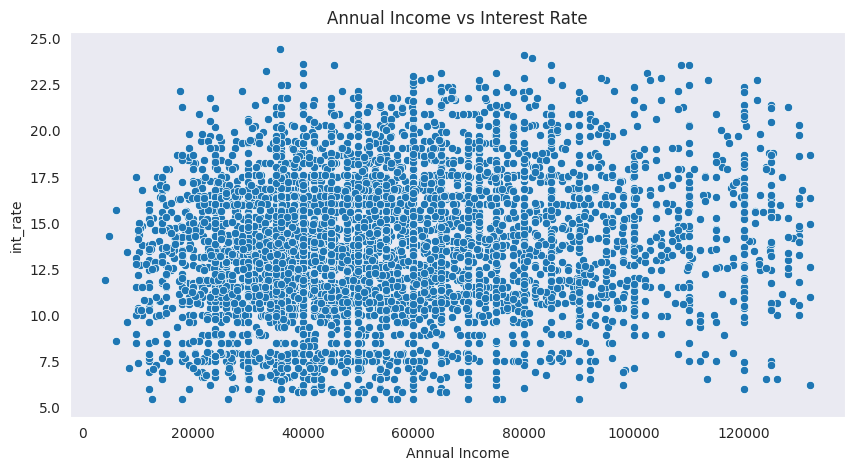

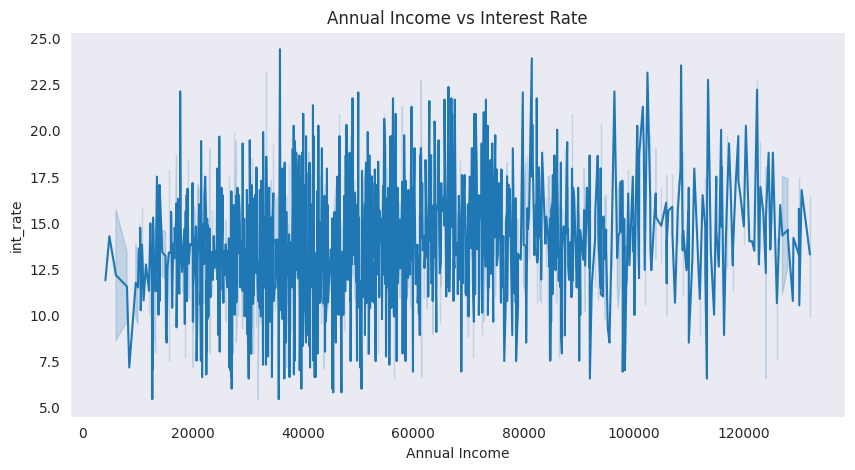

In [103]:
# Plot multiple graphs for annual income vs interest rate
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='annual_inc', y='int_rate')
plt.title('Annual Income vs Interest Rate')
plt.xlabel('Annual Income')

# Line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='annual_inc', y='int_rate')
plt.title('Annual Income vs Interest Rate')
plt.xlabel('Annual Income')

There is no clear pattern b/w annual income and interest rates. But very low income are given very low interest rates.

9. Loan Amount vs Interest rate

Text(0.5, 0, 'Loan Amount')

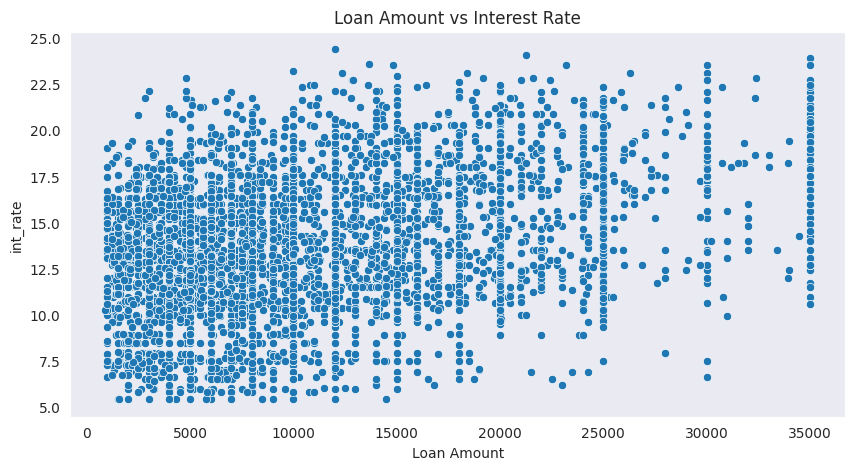

In [104]:
# Plot graph for loan amount vs interest rate
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='loan_amnt', y='int_rate')
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')

As the loan amount increases, interest rate increases, but the most number of defaulters have extremely low loan amount. This could indicate defaulters with very low credit scores.

10. Verification status vs grade

Text(0.5, 0, 'Grade')

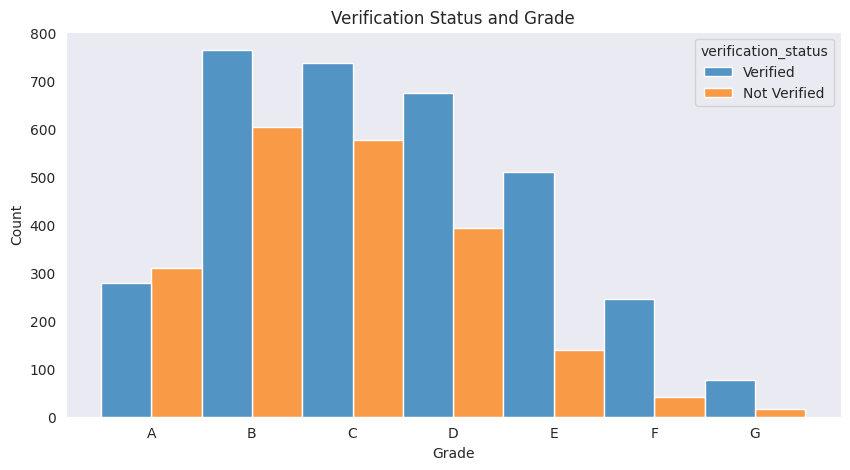

In [111]:
# plot a graph for verification status vs grade
plt.figure(figsize=(10, 5))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']
sns.histplot(data=df.sort_values(by='grade'), x='grade', hue='verification_status', stat="count", multiple="dodge")
plt.title('Verification Status and Grade')
plt.xlabel('Grade')

For good grade i.e A, there are more non verified defaulters than verified ones, but for remaining ones the number of verified defaulters is more than that of non verified.

11. Interest rate vs dti ratio vs loan amount vs annual income

<Figure size 1000x500 with 0 Axes>

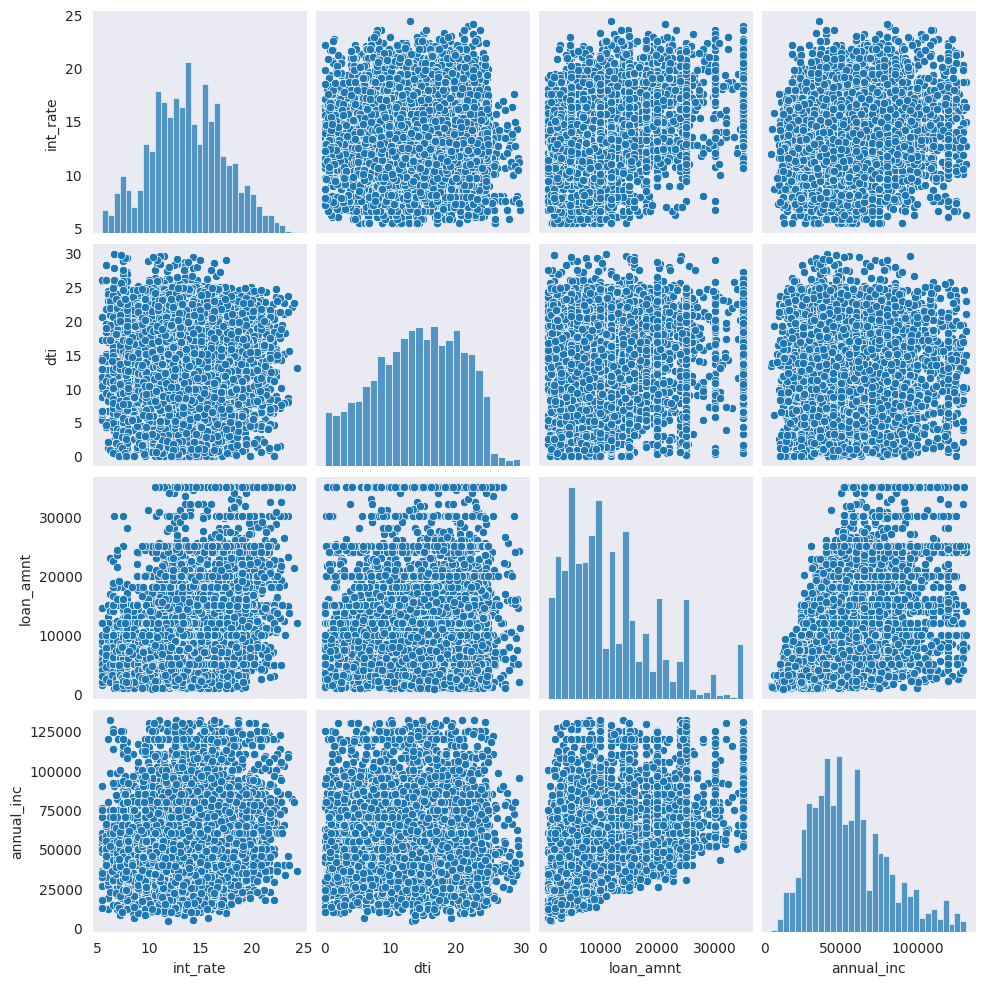

In [114]:
# Pair plot to show interest rate, dti, loan amount, annual income
plt.figure(figsize=(10, 5))
sns.pairplot(df[['int_rate', 'dti', 'loan_amnt', 'annual_inc']])


Relationship between various quantitative variables can be figured out from the above graph.

1. Interest rate and loan amount are directly related, as loan amount increases, interest rate increases
2. Loan amount and annual income are also directly related with few exceptions which must be taken into account for better risk management.
3. Annual income and dti ratio are inveresely related but few exceptions/ outliers exist which must be taken into account for better risk management.


12. Correlation Chart - Lets also see the relationship b/w quantitative variables through correlation

Text(0.5, 1.0, 'Correlation Chart')

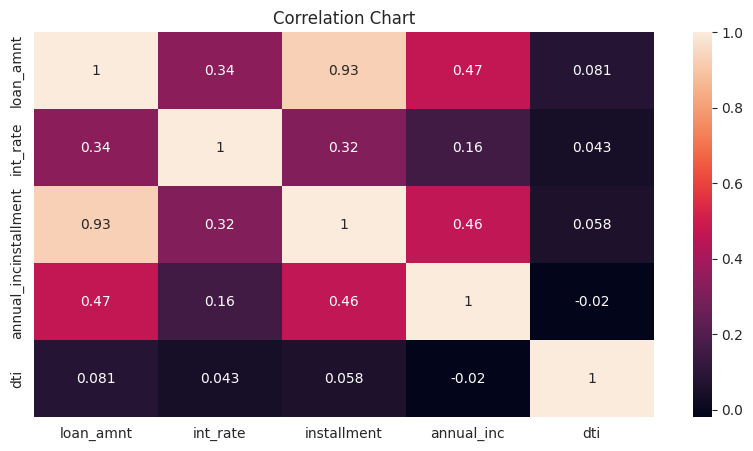

In [107]:
quantitative_variables = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']
# A correlation chart to show their relationship
plt.figure(figsize=(10, 5))
sns.heatmap(df[quantitative_variables].corr(), annot=True)
plt.title('Correlation Chart')

Correlation chart verifies the above points:


1.   Annual income and dti ratio are inversely related, as annual income increase, dti ratio decreases
2.   Installment rate and loan amount are highly positive correlated which means larger loan amounts have bigger terms.
3. Loan amount and annual income also have a positive correlation but its less than 0.5 which is a concern
4. Installment and annual income are positive correlated too which means people with higher annual income opt for higher installments.

